# Análisis del éxito de los canales de YouTube más vistos.
### 

## Objetivo:
- El objetivo de este proyecto es identificar los factores que contribuyen al éxito de los canales de YouTube más vistos, y determinar si las visualizaciones, los suscriptores, la fecha, la categoría del canal u otras variables juegan un papel significativo en dicho éxito. En definitiva, este proyecto proporcionará información valiosa que pueda ayudar a los creadores de contenido y a las agencias de marketing a tomar decisiones más documentadas sobre qué tipos de contenido producir, con qué categorías de canales asociarse y cómo asignar recursos para maximizar las oportunidades de éxito.

## Setup:
### Librerías necesarias para llevar acabo el proyecto

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

# Configuración de gráficos
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
from datetime import datetime

# Función lambda que hace escribir funciones en SQL mucho más fácil
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

### Importación del dataset 'Global YouTube Statistics'

In [2]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='ISO-8859-1') 

### Exploración inicial del dataset

In [3]:
df.shape

(995, 28)

## Limpieza de datos
- Para hacer la limpieza de forma exhaustiva pero sin perder información se pondrá especial interés en las columnas de ganancias, visualizaciones, suscriptores, país y categoría del canal 


### Busqueda de valores nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [5]:
# Porcentajes de valores nulos en cada columna:
for col in df.columns:
    nulos = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(nulos*100)))

rank - 0%
Youtuber - 0%
subscribers - 0%
video views - 0%
category - 5%
Title - 0%
uploads - 0%
Country - 12%
Abbreviation - 12%
channel_type - 3%
video_views_rank - 0%
country_rank - 12%
channel_type_rank - 3%
video_views_for_the_last_30_days - 6%
lowest_monthly_earnings - 0%
highest_monthly_earnings - 0%
lowest_yearly_earnings - 0%
highest_yearly_earnings - 0%
subscribers_for_last_30_days - 34%
created_year - 1%
created_month - 1%
created_date - 1%
Gross tertiary education enrollment (%) - 12%
Population - 12%
Unemployment rate - 12%
Urban_population - 12%
Latitude - 12%
Longitude - 12%


In [6]:
# Función para obtener filas con nulos
def filas_con_nulos(df):
    return df[df.isnull().any(axis=1)]

df_nulos = filas_con_nulos(df)

df_nulos

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,126226568.0,2.29,115782416.0,36.204824,138.252924
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,MoniLina,12400000,1.608681e+10,Comedy,MoniLinaFamily,0,United States,US,People,...,100.0,2016.0,May,10.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000,1.395959e+10,People & Blogs,annakova,1,NaN,NaN,Film,...,NaN,2006.0,Jun,18.0,NaN,NaN,NaN,NaN,NaN,NaN
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,...,NaN,2005.0,Oct,8.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891


### Eliminamos todas las filas que tengan valor nulo en la columna 'Country'

In [7]:
df = df.dropna(subset=['Country', 'channel_type'])

### Eliminamos duplicados

In [8]:
df = df.drop_duplicates()

### Reemplazo de valores nulos con la media de la columna

In [9]:
# Sustitución de valores nulos en las columnas 'subscribers_for_last_30_days' y 'video_views_for_the_last_30_days por la media de la columna
df['subscribers_for_last_30_days'] = df['subscribers_for_last_30_days'].fillna(df['subscribers_for_last_30_days'].mean())

df['video_views_for_the_last_30_days'] = df['video_views_for_the_last_30_days'].fillna(df['video_views_for_the_last_30_days'].mean())

### Reemplazo de valores nulos con el valor de una columna equivalente

In [10]:
# Comprobación de las filas que tienen valor nulo en la columna 'category'
def nulos_por_columna(df, col):
    return df[df[col].isnull()]

df_nulo_prueba_1 = nulos_por_columna(df, 'category')

df_nulo_prueba_1

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
18,19,Sports,75000000,0.000000e+00,NaN,sports,3,United States,US,Entertainment,...,3.536928e+05,2006.0,Jan,30.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
91,92,Vlad vï¿½ï¿½ï,37900000,2.351015e+10,NaN,Vlad vï¿½ï¿½ï,515,United States,US,Entertainment,...,2.000000e+05,2018.0,Jul,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
132,133,BETER Bï¿½ï¿½,32700000,1.918004e+10,NaN,BETER Bï¿½ï¿½,2738,Turkey,TR,Games,...,2.100000e+06,2012.0,Dec,12.0,23.9,8.342962e+07,13.49,63097818.0,38.963745,35.243322
155,156,Diana and Roma ESP,30700000,1.235599e+10,NaN,Diana and Roma ESP,578,United States,US,Entertainment,...,2.000000e+05,2016.0,Nov,27.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
161,162,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,30400000,1.799996e+10,NaN,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,532,United States,US,Entertainment,...,3.000000e+05,2018.0,Nov,3.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
214,215,D Billions,26200000,3.197746e+10,NaN,D Billions,775,United States,US,Entertainment,...,2.000000e+05,2019.0,Jul,27.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
255,256,shfa show India,24200000,1.572416e+10,NaN,shfa show India,469,United Arab Emirates,AE,People,...,2.000000e+05,2019.0,Apr,1.0,36.8,9.770529e+06,2.35,8479744.0,23.424076,53.847818
256,257,Super JoJo - Nursery Rhymes & Kids Songs,24100000,3.297749e+08,NaN,Super JoJo - Nursery Rhymes & Kids Songs,36,United States,US,Education,...,1.000000e+05,2019.0,May,31.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
261,262,Diana and Roma ARA,24100000,1.104126e+10,NaN,Diana and Roma ARA,590,United States,US,Entertainment,...,2.000000e+05,2019.0,Feb,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
312,313,Vlad and Niki Arabic,22500000,1.061370e+10,NaN,Vlad and Niki Arabic,526,United States,US,Entertainment,...,1.000000e+05,2018.0,Nov,9.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [11]:
# Sustitución de los valores nulos de la columna 'category' por los de la columna 'channel_type'
df['category'] = df['category'].fillna(df['channel_type'])

In [12]:
# Se puede comprobar que cada uno de los valores nulos de esa columna han sido sustituidos correctamente
df_nulo_prueba_2 = df[df['rank'].isin(df_nulo_prueba_1['rank'])]

df_nulo_prueba_2

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
18,19,Sports,75000000,0.000000e+00,Entertainment,sports,3,United States,US,Entertainment,...,3.536928e+05,2006.0,Jan,30.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
91,92,Vlad vï¿½ï¿½ï,37900000,2.351015e+10,Entertainment,Vlad vï¿½ï¿½ï,515,United States,US,Entertainment,...,2.000000e+05,2018.0,Jul,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
132,133,BETER Bï¿½ï¿½,32700000,1.918004e+10,Games,BETER Bï¿½ï¿½,2738,Turkey,TR,Games,...,2.100000e+06,2012.0,Dec,12.0,23.9,8.342962e+07,13.49,63097818.0,38.963745,35.243322
155,156,Diana and Roma ESP,30700000,1.235599e+10,Entertainment,Diana and Roma ESP,578,United States,US,Entertainment,...,2.000000e+05,2016.0,Nov,27.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
161,162,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,30400000,1.799996e+10,Entertainment,ýýýýýýýýýýýýýýý ýýýýýý ýýýýýýýýýýýýýýýýýý,532,United States,US,Entertainment,...,3.000000e+05,2018.0,Nov,3.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
214,215,D Billions,26200000,3.197746e+10,Entertainment,D Billions,775,United States,US,Entertainment,...,2.000000e+05,2019.0,Jul,27.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
255,256,shfa show India,24200000,1.572416e+10,People,shfa show India,469,United Arab Emirates,AE,People,...,2.000000e+05,2019.0,Apr,1.0,36.8,9.770529e+06,2.35,8479744.0,23.424076,53.847818
256,257,Super JoJo - Nursery Rhymes & Kids Songs,24100000,3.297749e+08,Education,Super JoJo - Nursery Rhymes & Kids Songs,36,United States,US,Education,...,1.000000e+05,2019.0,May,31.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
261,262,Diana and Roma ARA,24100000,1.104126e+10,Entertainment,Diana and Roma ARA,590,United States,US,Entertainment,...,2.000000e+05,2019.0,Feb,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
312,313,Vlad and Niki Arabic,22500000,1.061370e+10,Entertainment,Vlad and Niki Arabic,526,United States,US,Entertainment,...,1.000000e+05,2018.0,Nov,9.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [13]:
df_limpio = df.dropna()

### Comprobamos de nuevo con el dataset limpio de valores nulos

In [14]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     862 non-null    int64  
 1   Youtuber                                 862 non-null    object 
 2   subscribers                              862 non-null    int64  
 3   video views                              862 non-null    float64
 4   category                                 862 non-null    object 
 5   Title                                    862 non-null    object 
 6   uploads                                  862 non-null    int64  
 7   Country                                  862 non-null    object 
 8   Abbreviation                             862 non-null    object 
 9   channel_type                             862 non-null    object 
 10  video_views_rank                         862 non-null  

In [15]:
df_limpio

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,3.536928e+05,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,7.000000e+05,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,3.000000e+05,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,Games,HybridPanda,2452,United Kingdom,GB,Games,...,1.000000e+03,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,1.000000e+05,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


### Últimas modificaciones

In [16]:
# Aseguramos que todas las categorías son correctas para el análisis
valores_categoría = df_limpio['channel_type'].unique()

valores_categoría

array(['Music', 'Games', 'Entertainment', 'Education', 'People', 'Sports',
       'Film', 'News', 'Comedy', 'Howto', 'Nonprofit', 'Tech', 'Animals',
       'Autos'], dtype=object)

In [17]:
# La categoría 'Nonprofit' no obtiene ganancias
df_limpio = df_limpio[df_limpio['channel_type'] != 'Nonprofit']

In [18]:
# Por último, se aplica un filtro para las filas con 0 visualizaciones
df_filtro = df_limpio[df_limpio['video views'] > 0]

df_filtro

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,3.536928e+05,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,7.000000e+05,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,3.000000e+05,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,Games,HybridPanda,2452,United Kingdom,GB,Games,...,1.000000e+03,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,1.000000e+05,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


## Transformación de los datos

### Filtramos los valores próximos a 0 en la columna 'video views'

In [19]:
# Transformación de los valores numéricos a un formato legible
float64_col = [   
                'video views','video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 
                'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings',
                'subscribers_for_last_30_days', 'population', 'created_year', 'created_date'  
                ]

for col in df_filtro:
    if col in float64_col:
        df_filtro[col] = df_filtro[col].astype('int64')

df_transf = df_filtro

df_transf


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000,2006,Mar,13,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000,2012,Feb,20,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000,2006,Sep,1,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000,2006,Sep,20,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,93247040539,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,353692,2015,May,12,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000,2017,Feb,12,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000,2018,Sep,14,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2214684303,Games,HybridPanda,2452,United Kingdom,GB,Games,...,1000,2006,Sep,11,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000,2012,May,9,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


### Limpieza de Outliers y Tratamiento de datos ausentes

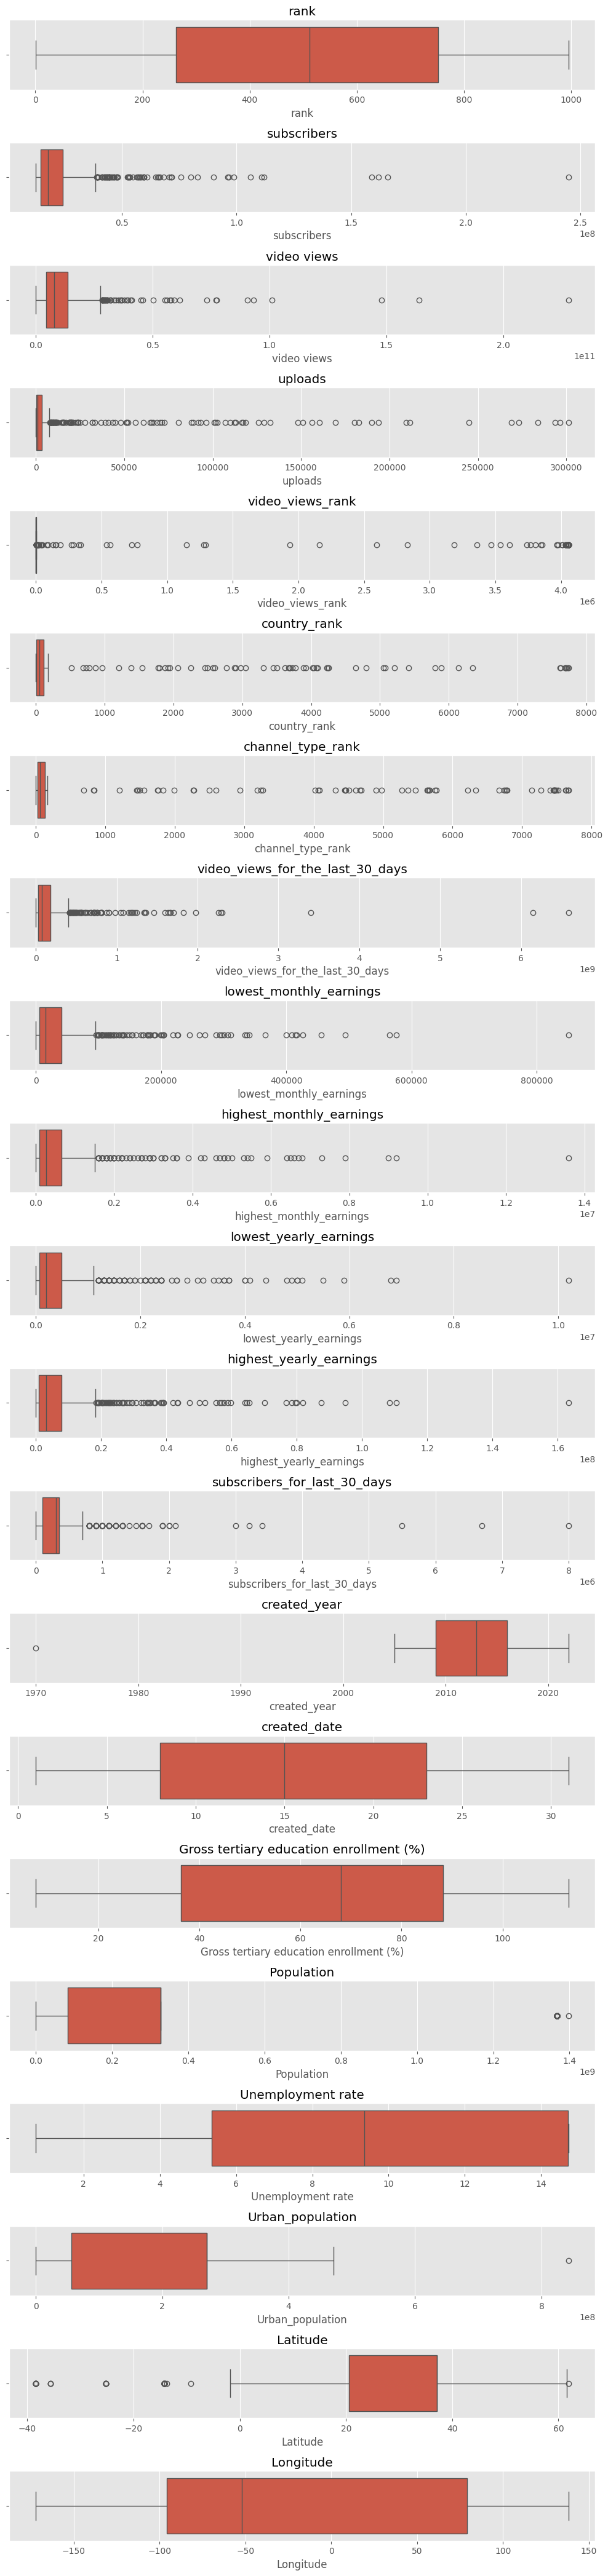

In [37]:
# Obtención de boxplots individuales sobre las columnas numéricas
df_numeric = df_transf.select_dtypes(include='number')

num_cols = df_transf.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [38]:
# En un principio se ha aplicado el método IQR para eliminiar los outliers, sin embargo el método zscore es menos agresivo y conserva una mayor cantidad de información

df = df_transf

# Lista de columnas con outliers
columns_with_outliers = ['subscribers', 'video views', 'uploads', 'video_views_rank',
                          'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
                          'lowest_monthly_earnings', 'highest_monthly_earnings',
                          'lowest_yearly_earnings', 'highest_yearly_earnings',
                          'subscribers_for_last_30_days']

# Método de IQR
# def remove_outliers(df, columna):
#     Q1 = df[columna].quantile(0.25)
#     Q3 = df[columna].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]
#     return df
# 
# # Eliminar outliers en las columnas especificadas
# for col in columns_with_outliers:
#     df = remove_outliers(df, col)

# Método de zscore
def remove_outliers_zscore(df, col, threshold=3):
    z_scores = zscore(df[col].dropna())
    abs_z_scores = np.abs(z_scores)
    filter = abs_z_scores < threshold
    return df[filter]

for col in columns_with_outliers:
    df = remove_outliers_zscore(df, col)

# Ahora df no tiene outliers en las columnas especificadas
df_sin_outliers = df

df_sin_outliers

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
19,20,Justin Bieber,71600000,30608119724,Music,Justin Bieber,249,Canada,CA,Music,...,100000,2007,Jan,15,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771
25,26,Shemaroo Filmi Gaane,65600000,28648024439,Music,Shemaroo Filmi Gaane,8502,India,IN,Music,...,400000,2010,Jun,11,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
28,29,Dude Perfect,59500000,16241549158,Sports,Dude Perfect,389,United States,US,Sports,...,100000,2009,Mar,17,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
34,35,Sony Music India,57200000,28837144516,Music,Sony Music India,3882,India,IN,Music,...,300000,2009,Sep,2,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
35,36,EminemMusic,56900000,27073872856,Music,EminemMusic,156,United States,US,Music,...,300000,2007,Feb,9,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,Caylus,12400000,4779139505,Education,Caylus,1340,United States,US,Games,...,400000,2016,Apr,6,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
989,990,Migos ATL,12400000,6993406259,Music,Migos ATL,99,United States,US,Entertainment,...,100000,2012,Jan,17,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000,2018,Sep,14,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000,2012,May,9,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


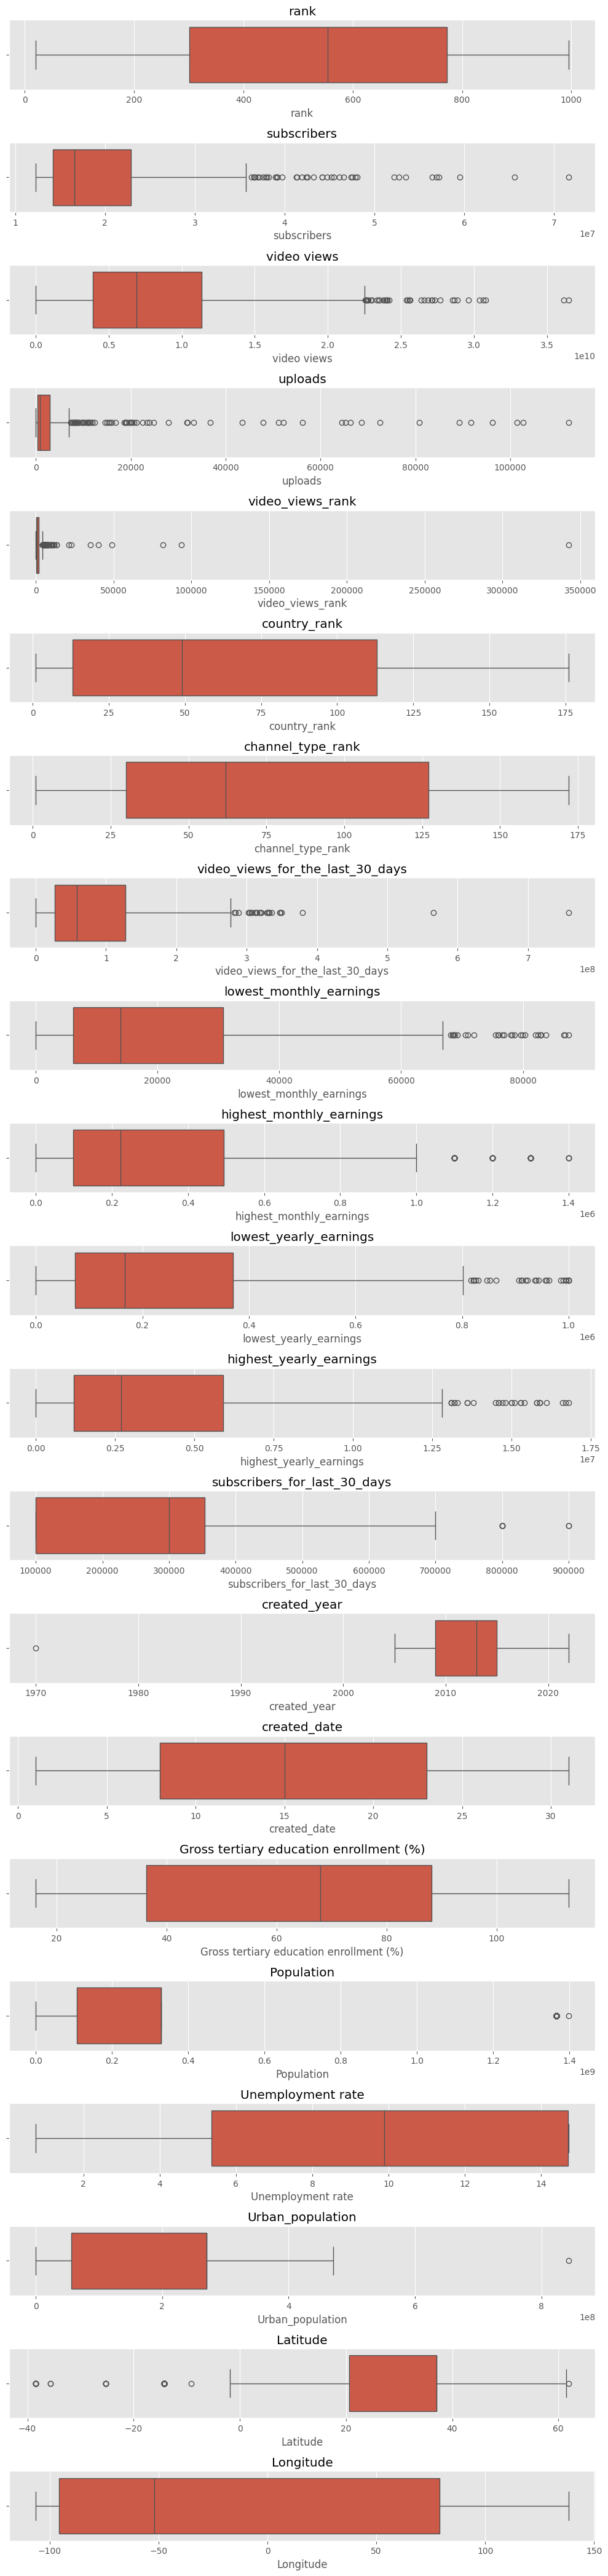

In [22]:
# Obtención de boxplots individuales sobre las columnas numéricas sin outliers
df_numeric = df_sin_outliers.select_dtypes(include=['float64', 'int64'])

num_cols = df_sin_outliers.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Creación de featurings

In [23]:
# Creación de una columna datetime
dict_mes = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

df_sin_outliers['created_month'] = df_sin_outliers['created_month'].map(dict_mes)

df_sin_outliers.rename(columns={
    'created_date': 'day',
    'created_month': 'month',
    'created_year': 'year'
}, inplace=True)

df_sin_outliers['fecha'] = pd.to_datetime(df_sin_outliers[['year', 'month', 'day']])

df = df_sin_outliers

df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,year,month,day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,fecha
19,20,Justin Bieber,71600000,30608119724,Music,Justin Bieber,249,Canada,CA,Music,...,2007,1,15,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771,2007-01-15
25,26,Shemaroo Filmi Gaane,65600000,28648024439,Music,Shemaroo Filmi Gaane,8502,India,IN,Music,...,2010,6,11,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2010-06-11
28,29,Dude Perfect,59500000,16241549158,Sports,Dude Perfect,389,United States,US,Sports,...,2009,3,17,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2009-03-17
34,35,Sony Music India,57200000,28837144516,Music,Sony Music India,3882,India,IN,Music,...,2009,9,2,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2009-09-02
35,36,EminemMusic,56900000,27073872856,Music,EminemMusic,156,United States,US,Music,...,2007,2,9,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2007-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,Caylus,12400000,4779139505,Education,Caylus,1340,United States,US,Games,...,2016,4,6,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2016-04-06
989,990,Migos ATL,12400000,6993406259,Music,Migos ATL,99,United States,US,Entertainment,...,2012,1,17,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2012-01-17
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,2018,9,14,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2018-09-14
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,2012,5,9,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,2012-05-09


In [24]:
# Creación de una columna de ganancia media anual
df['Ganancias medias'] = (df['highest_yearly_earnings'] + df['lowest_yearly_earnings'])/2

df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,month,day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,fecha,Ganancias medias
19,20,Justin Bieber,71600000,30608119724,Music,Justin Bieber,249,Canada,CA,Music,...,1,15,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771,2007-01-15,4514500.0
25,26,Shemaroo Filmi Gaane,65600000,28648024439,Music,Shemaroo Filmi Gaane,8502,India,IN,Music,...,6,11,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2010-06-11,6482450.0
28,29,Dude Perfect,59500000,16241549158,Sports,Dude Perfect,389,United States,US,Sports,...,3,17,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2009-03-17,3611800.0
34,35,Sony Music India,57200000,28837144516,Music,Sony Music India,3882,India,IN,Music,...,9,2,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2009-09-02,6588950.0
35,36,EminemMusic,56900000,27073872856,Music,EminemMusic,156,United States,US,Music,...,2,9,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2007-02-09,6640300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,Caylus,12400000,4779139505,Education,Caylus,1340,United States,US,Games,...,4,6,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2016-04-06,4516400.0
989,990,Migos ATL,12400000,6993406259,Music,Migos ATL,99,United States,US,Entertainment,...,1,17,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2012-01-17,1274100.0
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,9,14,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,2018-09-14,1647100.0
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,5,9,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,2012-05-09,98700.0


## Exploración de datos

### Analizamos qué columnas tienen mayor correlación entre sí

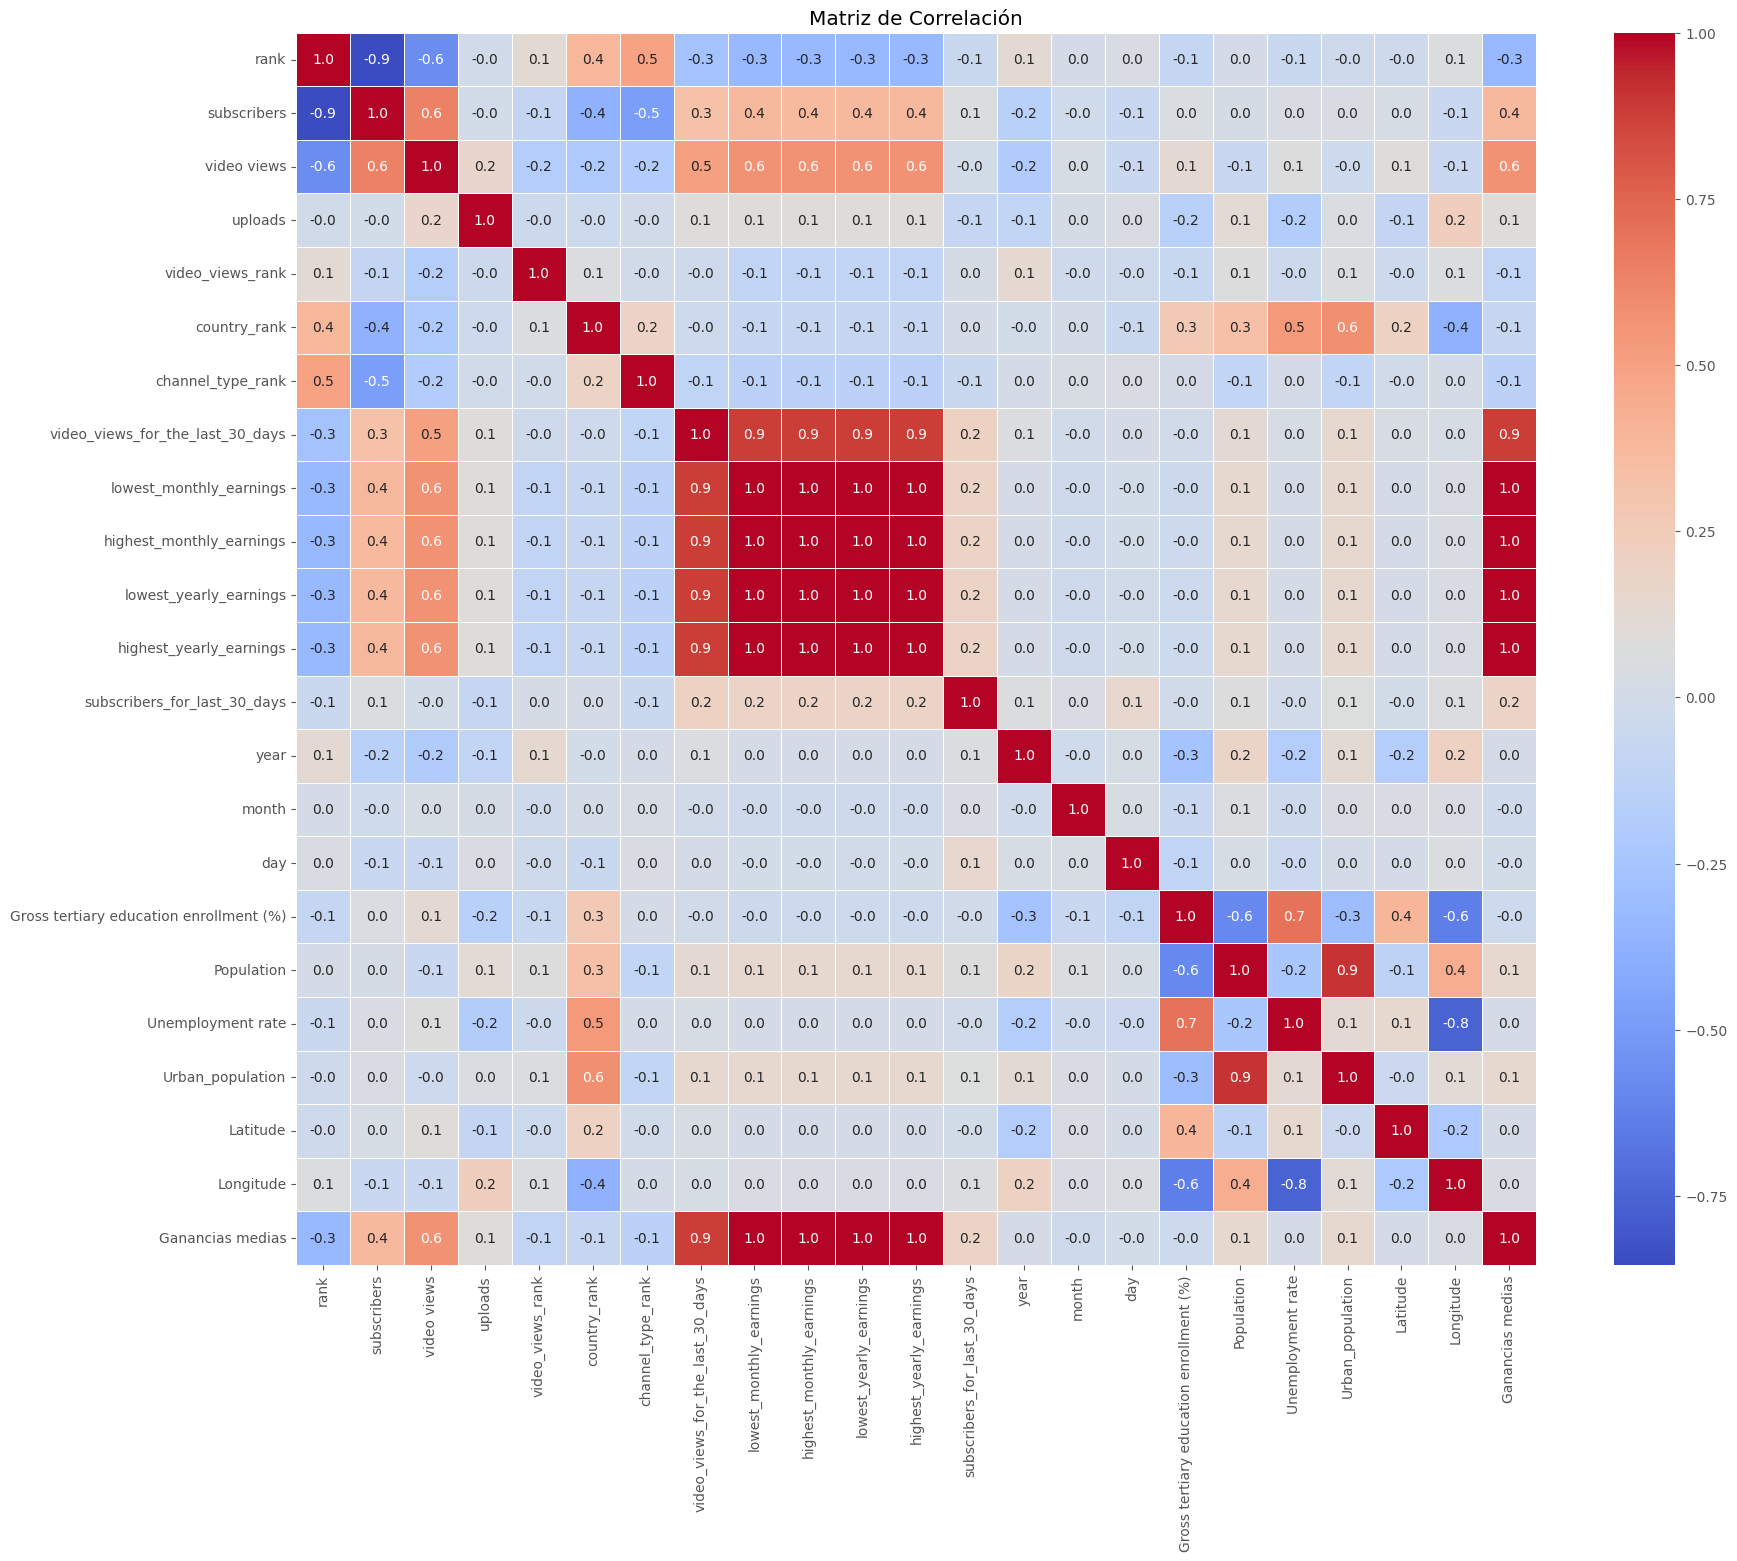

In [25]:
# Exclusión de columnas no numéricas
df_numeric = df.select_dtypes(include='number')

# Cálculo de la matriz de correlación
matrix_correlación = df_numeric.corr()

# Configuración
plt.figure(figsize=(20, 16))
sns.heatmap(matrix_correlación, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title("Matriz de Correlación")

plt.show()

### Las ganancias tienen mayor correlación con las visualizaciones

Text(0.5, 1.0, 'Ganancias medias vs Visualizaciones')

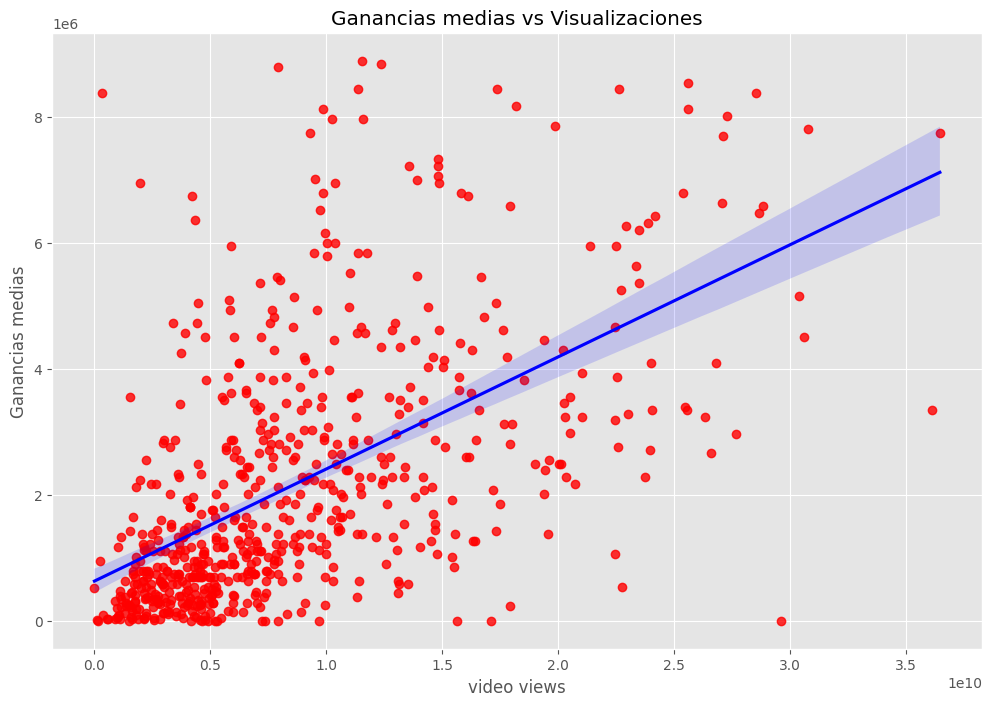

In [26]:
sns.regplot(x="video views", y="Ganancias medias", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Ganancias medias vs Visualizaciones')

## Análisis por categoría del canal

- Estudiamos la correlación entre la categoría y las ganancias, que ya sabemos que están relacionadas con las visualizaciones.

### Tabla de categorías con recuento de canales, total de visualizaciones y total de suscriptores

In [27]:
# Creación de una tabla agrupada por categorías con el recuento de canales, total de suscriptores, total de visualizaciones y ganancia media anual
df_categoría = df.groupby('channel_type').agg(
    count=('channel_type', 'size'),
    total_subscribers=('subscribers', 'sum'),
    total_video_views=('video views', 'sum'),
    ganancia_media_categoría=('Ganancias medias', 'mean')
    
).reset_index()

df_categoría.columns =  ['Categoría', 'Total de Youtubers', 'Total Suscriptores', 'Total Visualizaciones', 'Ganancia media anual' ]

df_categoría.sort_values('Ganancia media anual', ascending= False, inplace=True)

df_categoría['Ganancia media anual'] = df_categoría['Ganancia media anual'].astype(int)

df_categoría

,Categoría,Total de Youtubers,Total Suscriptores,Total Visualizaciones,Ganancia media anual
8,News,10,185600000,81151116509,3278425
2,Education,41,821100000,390314566110,2990395
7,Music,160,3614500000,2044580460872,2875962
4,Film,27,560100000,228304234222,2537000
3,Entertainment,222,4286400000,1778861629960,1980939
9,People,46,791200000,271821355340,1825600
10,Sports,8,171900000,51927070132,1737406
5,Games,65,1190500000,417534436456,1587794
11,Tech,15,287800000,52712156822,1558516
1,Comedy,35,714900000,244063247087,1466477


In [28]:
# Como alternativa al paso anterior podemos realizar una consulta SQL:
q = '''
        SELECT 
            channel_type AS Categoría,
            COUNT(channel_type) AS Total_de_Youtubers,
            SUM(subscribers) AS Total_Suscriptores,
            SUM("video views") AS Total_Visualizaciones,
            AVG("Ganancias medias") AS Ganancia_media_anual_por_categoría
        FROM 
            df
        GROUP BY 
            Categoría
        ORDER BY 
            Ganancia_media_anual_por_categoría DESC
'''

pysqldf(q)

,Categoría,Total_de_Youtubers,Total_Suscriptores,Total_Visualizaciones,Ganancia_media_anual_por_categoría
0,News,10,185600000,81151116509,3.278425e+06
1,Education,41,821100000,390314566110,2.990395e+06
2,Music,160,3614500000,2044580460872,2.875962e+06
3,Film,27,560100000,228304234222,2.537000e+06
4,Entertainment,222,4286400000,1778861629960,1.980940e+06
5,People,46,791200000,271821355340,1.825600e+06
6,Sports,8,171900000,51927070132,1.737406e+06
7,Games,65,1190500000,417534436456,1.587795e+06
8,Tech,15,287800000,52712156822,1.558517e+06
9,Comedy,35,714900000,244063247087,1.466477e+06


### Observaciones de la tabla
- Los canales de noticias tienen una ganancia media anual mayor que ninguna otra categoría, seguidos por las categorías de educación, música y películas. Sin embargo, es llamativa la gran diferencia entre el número de canales de música (160) frente al número de canales de noticias (10), educación (41) y películas (27).


### Generamos nuevas columnas numéricas en relación a la categoría del canal

In [39]:
# Generamos nuevas columnas numéricas para examinar la correlación directa entre cada categoría y las ganancias medias anuales
df = pd.get_dummies(df, columns=['category'], dtype=int)

# Eliminación de columnas no numéricas
df_num = df.select_dtypes(include=['number'])

df_num

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,category_News & Politics,category_People,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Tech,category_Trailers,category_Travel & Events
19,20,71600000,30608119724,249,38,1,6,176326000,44100,705300,...,0,0,0,0,0,0,0,0,0,0
25,26,65600000,28648024439,8502,47,8,8,254961000,63700,1000000,...,0,0,0,0,0,0,0,0,0,0
28,29,59500000,16241549158,389,182,9,3,141200000,35300,564800,...,0,0,0,0,0,0,1,0,0,0
34,35,57200000,28837144516,3882,45,14,13,259310000,64800,1000000,...,0,0,0,0,0,0,0,0,0,0
35,36,56900000,27073872856,156,59,10,14,260193000,65000,1000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,12400000,4779139505,1340,1442,175,68,177600000,44400,710400,...,0,0,0,0,0,0,0,0,0,0
989,990,12400000,6993406259,99,833,175,171,49412000,12400,197600,...,0,0,0,0,0,0,0,0,0,0
991,992,12300000,1674409945,1500,6141,125,69,64735000,16200,258900,...,0,0,1,0,0,0,0,0,0,0
993,994,12300000,374123483,39,35112,4,69,3871000,968,15500,...,0,0,0,0,0,0,0,0,0,0


### Correlación entre categoría y ganancias

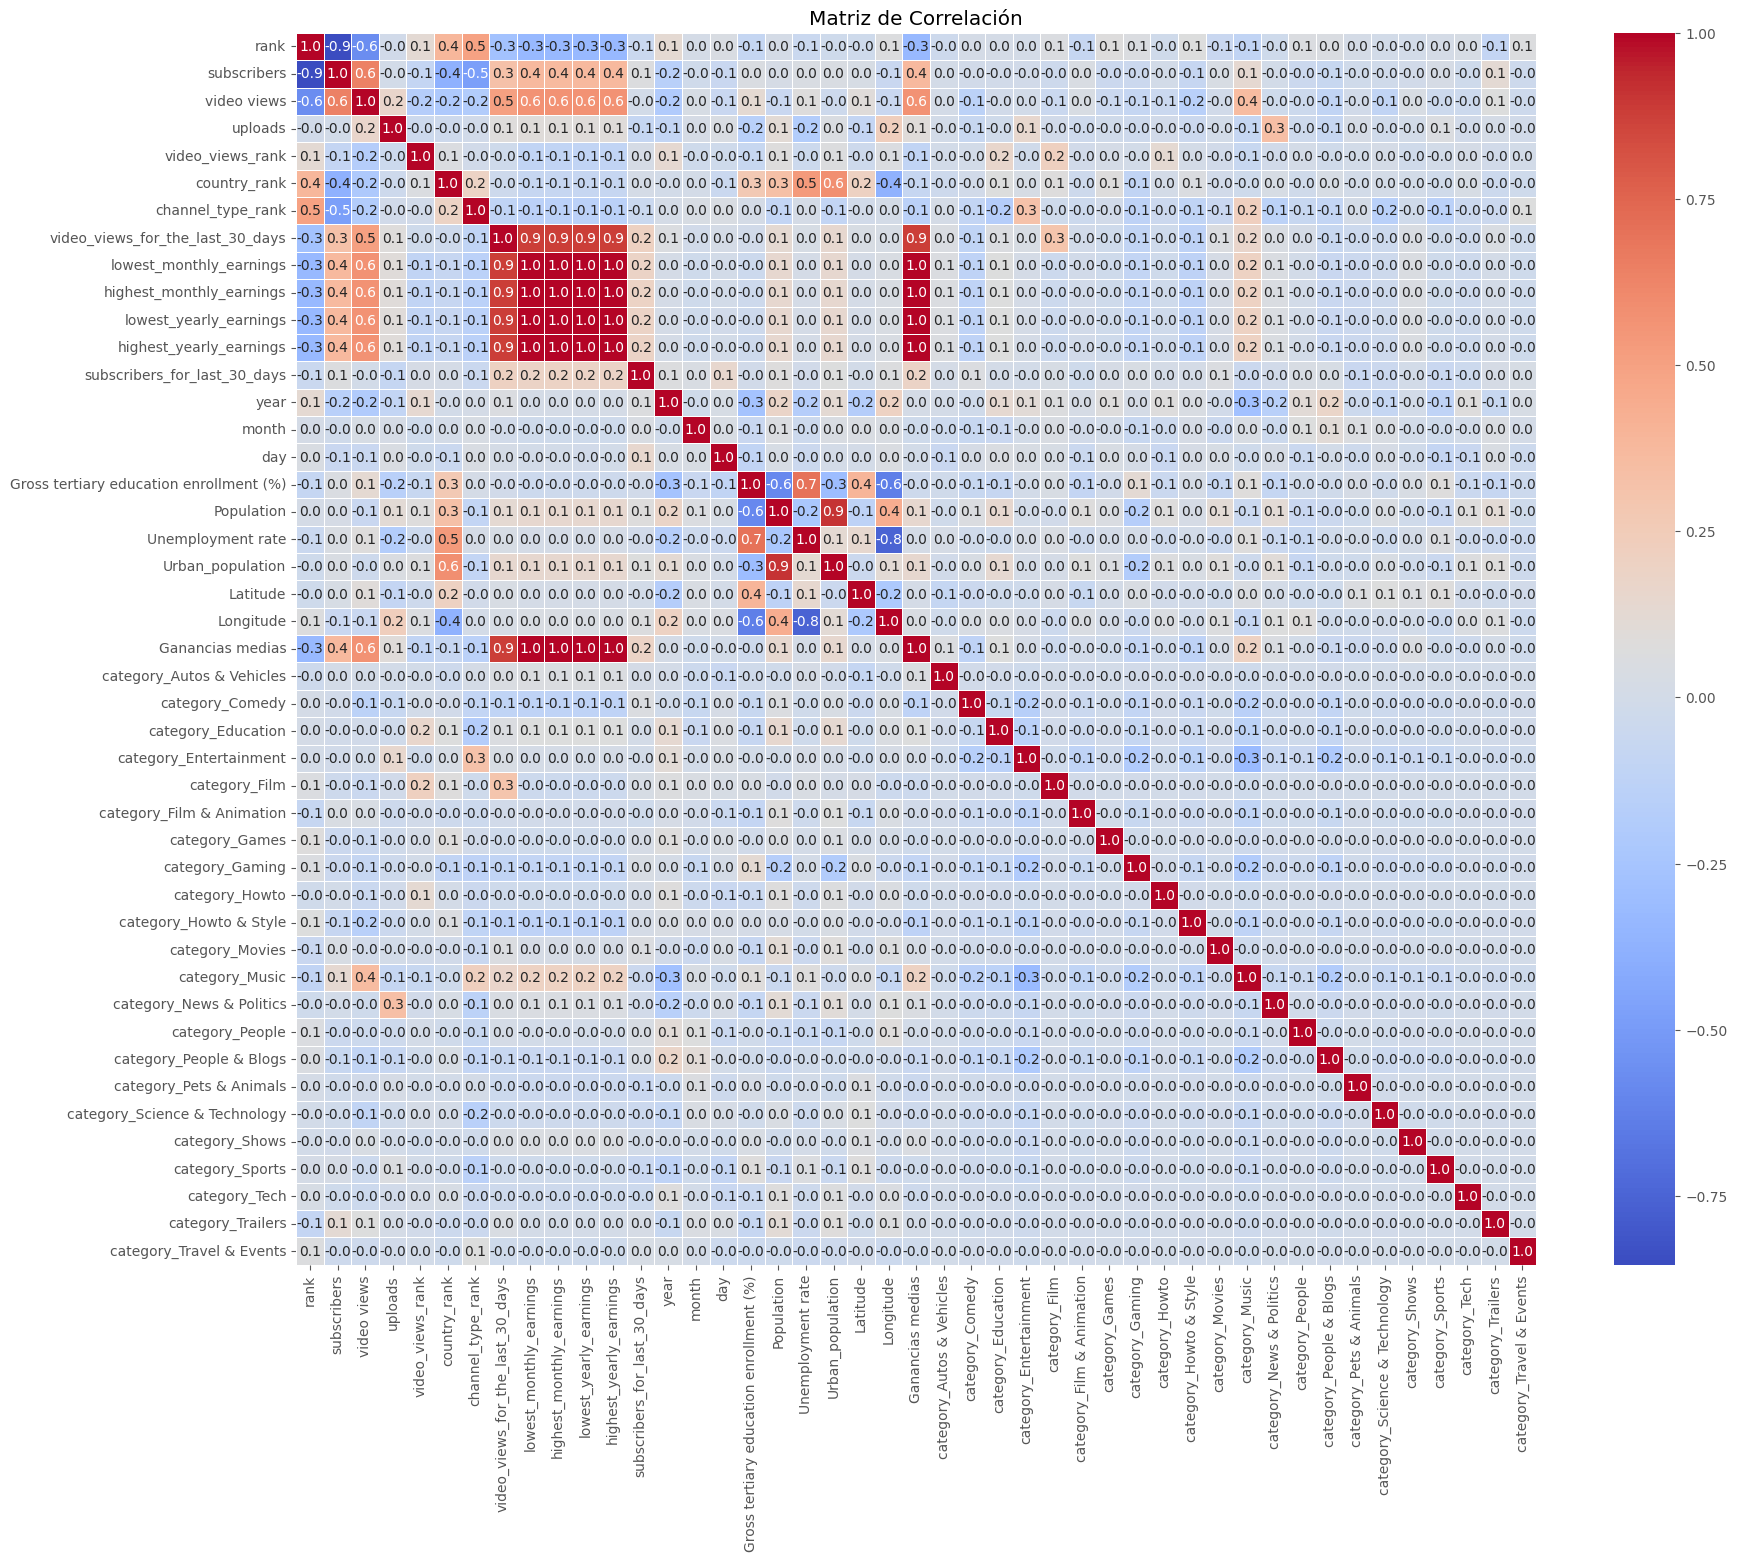

In [31]:
# Cálculo de la matriz de correlación
matrix_correlación = df_num.corr()

# Configuración
plt.figure(figsize=(20, 16))
sns.heatmap(matrix_correlación, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title("Matriz de Correlación")

plt.show()

### Correlación entre la categoría de música con las visualizaciones y ganancia media anual

Text(0.5, 1.0, 'Categoría musical vs Views')

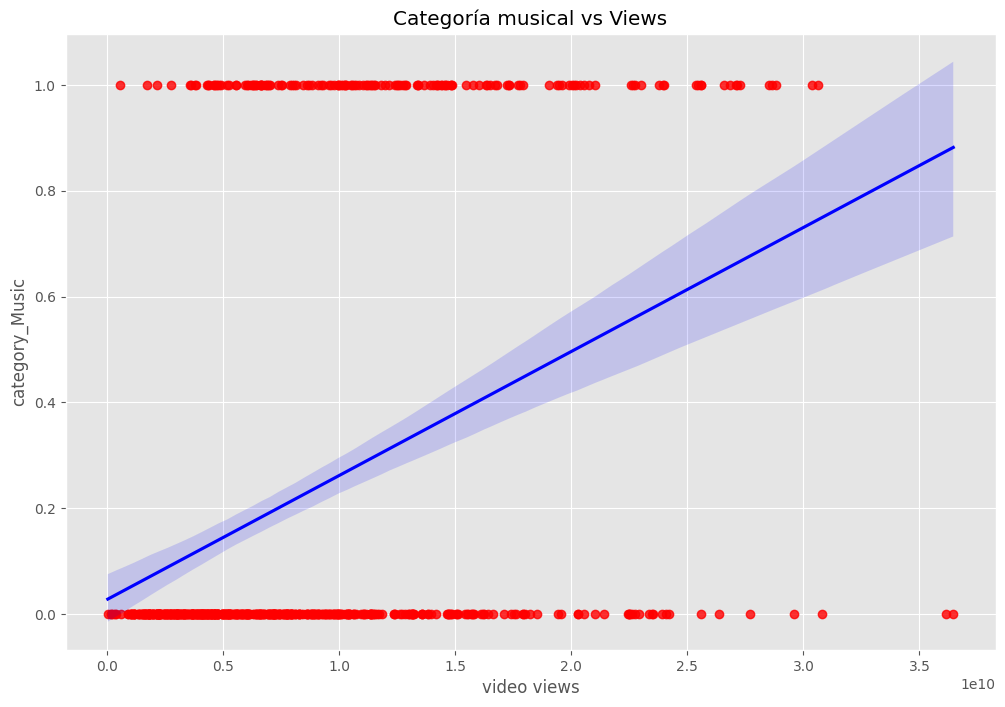

In [32]:
sns.regplot(x="video views", y="category_Music", data=df_num, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Categoría musical vs Views')

Text(0.5, 1.0, 'Categoría musical Vs Ganancias')

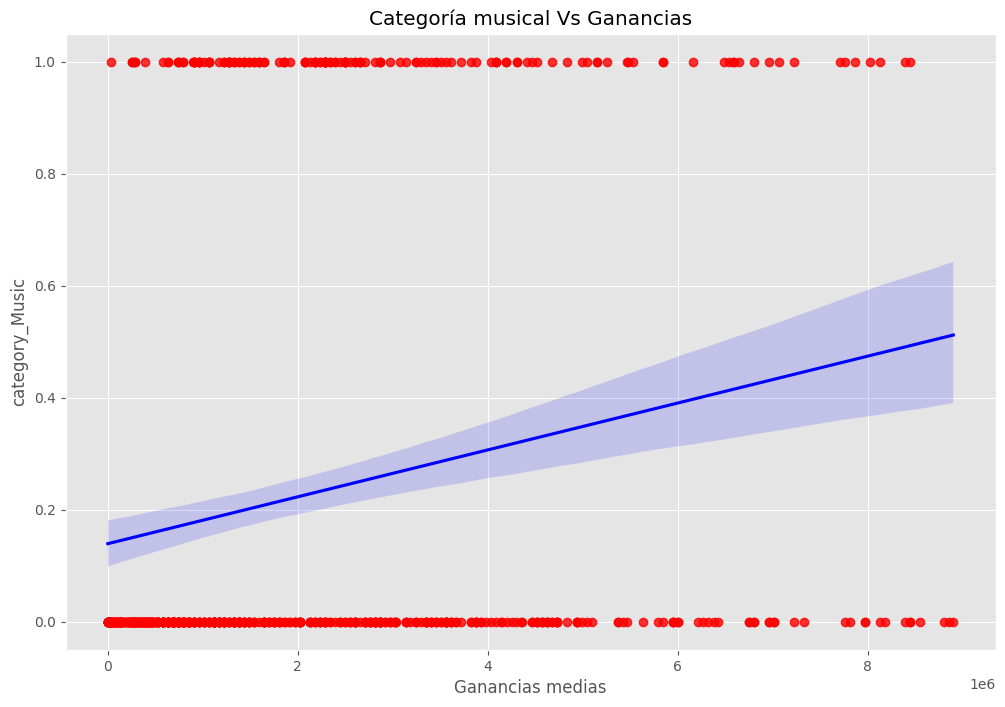

In [33]:
sns.regplot(x="Ganancias medias", y="category_Music", data=df_num, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Categoría musical Vs Ganancias')

### Conclusiones del análisis
- La categoría música es la que más correlación guarda con el número de visualizaciones y por tanto también con las ganancias.
- También se puede observar una correlación inversa entre los canales de música y el año de creación del canal.